### Problem Statement
You are a data scientist working for a school

You are asked to predict the GPA of the current students based on the following provided data:

 0   StudentID  int64  
 1   Age    int64  
 2   Gender int64  
 3   Ethnicity  int64  
 4   ParentalEducation  int64  
 5   StudyTimeWeekly    float64
 6   Absences   int64  
 7   Tutoring   int64  
 8   ParentalSupport    int64  
 9   Extracurricular    int64  
 10  Sports int64  
 11  Music  int64  
 12  Volunteering   int64  
 13  GPA    float64
 14  GradeClass float64

The GPA is the Grade Point Average, typically ranges from 0.0 to 4.0 in most educational systems, with 4.0 representing an 'A' or excellent performance.

The minimum passing GPA can vary by institution, but it's often around 2.0. This usually corresponds to a 'C' grade, which is considered satisfactory.

You need to create a Deep Learning model capable to predict the GPA of a Student based on a set of provided features.
The data provided represents 2,392 students.

In this excersice you will be requested to create a total of three models and select the most performant one.


### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### 2) Load Data

- You will be provided with a cvs (comma separated value) file.
- You will need to add that file into a pandas dataframe, you can use the following code as reference
- The file will be available in canvas

In [64]:
data = pd.read_csv("Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


### 3) Review you data:

Make sure you review your data.
Place special attention of null or empty values.

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 4. Remove the columns not needed for Student performance prediction

- Choose only the columns you consider to be valuable for your model training.
- For example, StudentID might not be a good feature for your model, and thus should be removed from your main dataset, which other columns should also be removed?
- You can name that final dataset as 'dataset'

In [97]:
# Your code here
df = pd.read_csv("Student_performance_data _.csv")

dataset = df.drop(columns=['StudentID', 'GradeClass', 'Ethnicity', 'Gender'])

dataset.head()

,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,2,4.672495,17,1,3,0,0,0,0,1.288061


### 5. Check if the columns has any null values:
- Here you now have your final dataset to use in your model training.
- Before moving foward review your data check for any null or empty value that might be needed to be removed

In [98]:
# Your code here
null_values = dataset.isnull().sum()

print(null_values[null_values > 0])

Series([], dtype: int64)


### 6. Prepare your data for training and for testing set:
 - First create a dataset named X, with all columns but GPA. These are the features
 - Next create another dataset named y, with only GPA column. This is the label
 - If you go to your Imports, you will see the following import: **'from sklearn.model_selection import train_test_split'**
 - Use that *train_test_split* function to create: X_train, X_test, y_train and y_test respectively. Use X and y datasets as parameters. Other parameters to use are: Test Size = 0.2, Random State = 42.

 - Standarize your features (X_train and X_test) by using the StandardScaler (investigate how to use fit_transform and transform functions). This will help the training process by dealing with normilized data.

 Note: Your X_train shape should be around (1913, 10). This means the dataset has 10 columns which should be the input.

In [99]:
# Your code here

X = dataset.drop(columns=['GPA'])  # Features
y = dataset['GPA']  # Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)


X_train shape: (1913, 10)
X_test shape: (479, 10)


### 7. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention of 10 and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with 1 unit, do not define an activation function so it defaults to linear, suitable for regression tasks. e.g. Dense(1)

This last part of the output layer is super important, since we want to predict the GPA, this means that we want a regression and not a classification. Linear activation function is best for regression and Sigmoid is best for Binary Classification

In [104]:
# Your code here
model = Sequential()

model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 8. Compile your Neural Network
- Choose Adam as the optimizer
- And MSE as the Loss function
- Also add the following metrics: Mean Absolute Error

In [105]:
# Your code here
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

### 9. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [106]:
# Your code here
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.5346 - mean_absolute_error: 0.7853 - val_loss: 0.0888 - val_mean_absolute_error: 0.2397
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0887 - mean_absolute_error: 0.2402 - val_loss: 0.0749 - val_mean_absolute_error: 0.2200
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0869 - mean_absolute_error: 0.2394 - val_loss: 0.1306 - val_mean_absolute_error: 0.3047
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0765 - mean_absolute_error: 0.2213 - val_loss: 0.0692 - val_mean_absolute_error: 0.2099
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0767 - mean_absolute_error: 0.2214 - val_loss: 0.0936 - val_mean_absolute_error: 0.2452
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0814 - mean_absolute_error: 0.2296 - val_loss: 0.0729 - val_mean_absolute_error: 0.2160
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0665 - mean_absolute_error: 0.2070 - v

### 10. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Training and Validation Loss over Epochs
- In a second graph:
   - Plot the Training MAE and the Validation MAE
   - X Label = Epochs
   - Y Label = Mean Absolute Error (MAE)
   - Title = Training and Validation MAE over Epochs

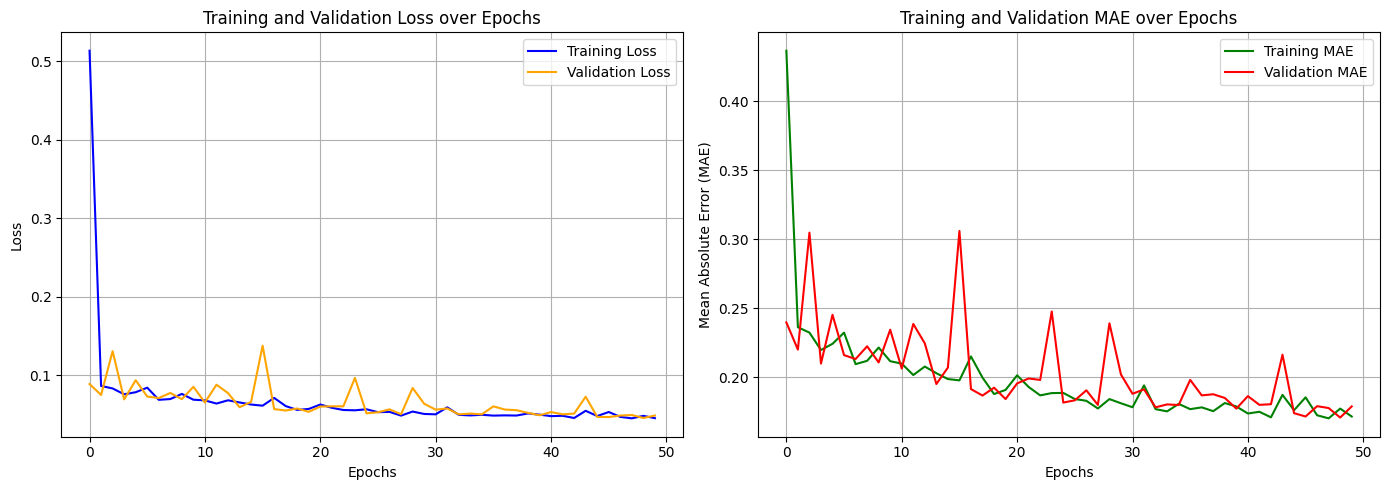

In [107]:
# Your code here
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Training MAE', color='green')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE', color='red')
plt.title('Training and Validation MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### 11. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [108]:
# Your code here
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)

# Print the results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8545 - mean_absolute_error: 0.7680 
Test Loss: 0.8866
Test MAE: 0.7922


### 12. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- How good was your model?

In [109]:
# Your code here
y_pred = model.predict(X_test_scaled)

print("Predictions vs Actual Values:")
for i in range(len(y_pred)):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {y_test.iloc[i]:.2f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Predictions vs Actual Values:
Predicted: 2.63, Actual: 1.43
Predicted: 1.67, Actual: 3.12
Predicted: 1.18, Actual: 2.04
Predicted: 1.72, Actual: 3.55
Predicted: 1.65, Actual: 0.25
Predicted: 1.54, Actual: 2.63
Predicted: 2.35, Actual: 2.06
Predicted: 3.40, Actual: 2.25
Predicted: 1.26, Actual: 2.19
Predicted: 1.53, Actual: 0.76
Predicted: 2.50, Actual: 2.37
Predicted: 1.06, Actual: 0.77
Predicted: 2.08, Actual: 2.95
Predicted: 1.83, Actual: 2.34
Predicted: 1.58, Actual: 2.77
Predicted: 1.26, Actual: 0.29
Predicted: 1.08, Actual: 1.02
Predicted: 2.19, Actual: 1.63
Predicted: 2.74, Actual: 2.07
Predicted: 2.99, Actual: 2.42
Predicted: 1.71, Actual: 1.76
Predicted: 1.88, Actual: 1.57
Predicted: 1.38, Actual: 1.71
Predicted: 1.63, Actual: 3.16
Predicted: 1.56, Actual: 1.73
Predicted: 1.14, Actual: 0.84
Predicted: 1.42, Actual: 1.38
Predicted: 1.83, Actual: 3.03
Predicted: 1.95, Actual: 2.19
Predicted: 1.70, Actual: 2.32
Predicted: 2.00, Actual: 2.07
P

### 13. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [110]:
# Your code here
df = pd.read_csv("Student_performance_data _.csv")


X = dataset.drop(columns=['GPA'])  # Features
y = dataset['GPA']  # Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model2 = Sequential()
model2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train_scaled.shape[1],)))
model2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
history2 = model2.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

loss2, mae2 = model2.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Model 2 - Loss: {loss2:.4f}, MAE: {mae2:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model 2 - Loss: 0.1875, MAE: 0.1697


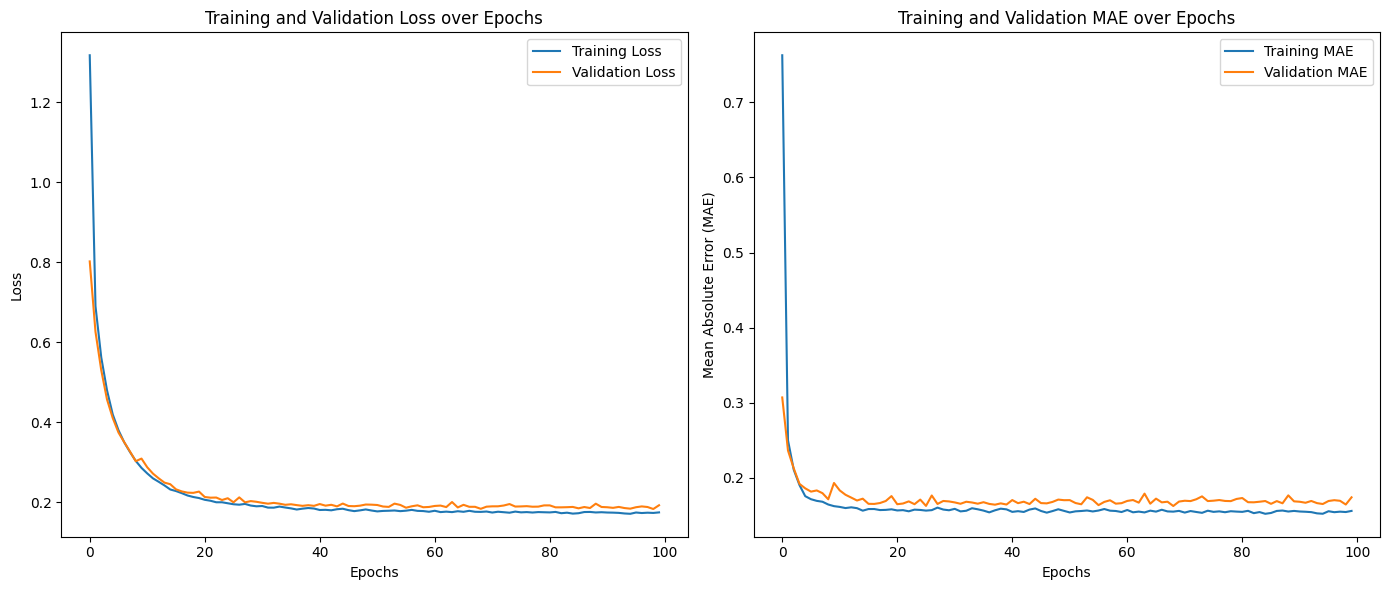

In [118]:

plt.figure(figsize=(14, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

# MAE Plot
plt.subplot(1, 2, 2)
plt.plot(history2.history['mae'], label='Training MAE')
plt.plot(history2.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE over Epochs')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


Lo que se cambio fue que principalmente se aumento el numero de iteraciones que hace el modelo, en vez de 50 iteraciones, se hacen 100 iteraciones, a su vez, se aumentan los grupos de 10 a 16, para que sea diferente.

#### Model 3:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [111]:
# Your code here

X = dataset.drop(columns=['GPA'])  # Features
y = dataset['GPA']  # Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model3 = Sequential()
model3.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1))

model3.compile(optimizer='RMSprop', loss='mean_squared_error', metrics=['mae'])
history3 = model3.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=0)

loss3, mae3 = model3.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Model 3 - Loss: {loss3:.4f}, MAE: {mae3:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model 3 - Loss: 0.1041, MAE: 0.2607


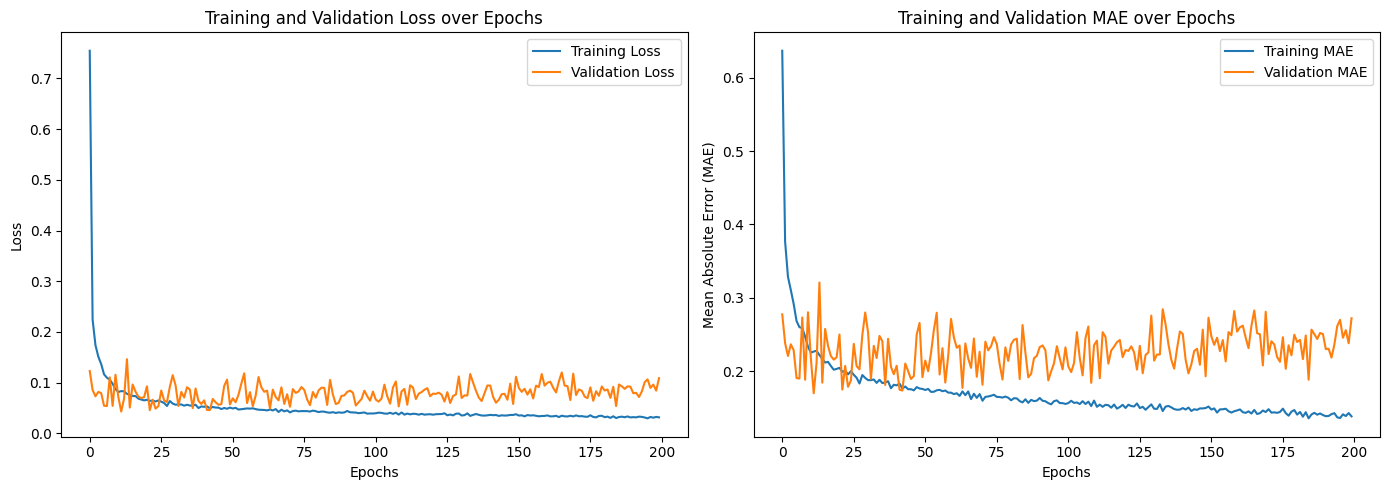

In [119]:
plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history3.history['mae'], label='Training MAE')
plt.plot(history3.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()

plt.tight_layout()
plt.show()

Lo que se cambio fue que principalmente se aumento el numero de iteraciones que hace el modelo, en vez de 50 iteraciones, se hacen 200 iteraciones, a su vez, se aumentan los grupos de 10 a 32, para que sea diferente y se usa dropout para evitar overfiting de los datos

In [122]:
results_df = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'Loss': [test_loss, loss2, loss3],
    'MAE': [test_mae, mae2, mae3]
})

print(results_df)

     Model      Loss       MAE
0  Model 1  0.886602  0.792226
1  Model 2  0.187529  0.169739
2  Model 3  0.104085  0.260689


In [117]:
predictions_model1 = model.predict(X_test_scaled)
predictions_model2 = model2.predict(X_test_scaled)
predictions_model3 = model3.predict(X_test_scaled)

print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

if len(y_test) == len(X_test):
    num_students = min(5, len(X_test))
    students_indices = range(num_students)
    students_gpa = y_test.iloc[students_indices].values

    results_df = pd.DataFrame({
        'Student Index': students_indices,
        'GPA M1': predictions_model1[:num_students].flatten(),
        'GPA M2': predictions_model2[:num_students].flatten(),
        'GPA M3': predictions_model3[:num_students].flatten(),
        'Actual': students_gpa,
    })

    print(results_df)
else:
    print("La longitud de y_test no coincide con la longitud de X_test.")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of X_test: (479, 10)
Shape of y_test: (479,)
   Student Index    GPA M1    GPA M2    GPA M3    Actual
0              0  2.629927  1.561766  1.396056  1.427724
1              1  1.669529  2.766912  2.508983  3.117354
2              2  1.176771  1.662715  1.741357  2.037769
3              3  1.715570  3.343588  2.950535  3.548521
4              4  1.653194  0.302073  0.606427  0.248977
